In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score


In [3]:

df = pd.read_csv("creditcard.csv")

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['Class'].value_counts()  # 0 = Normal, 1 = Fraud


Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
df = df.drop(['Time'], axis=1)

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_normal = X_train[y_train == 0]
X_test_normal = X_test[y_test == 0]
X_test_fraud = X_test[y_test == 1]


In [6]:
input_dim = X_train_normal.shape[1]

# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(14, activation="tanh")(input_layer)
# encoder = Dense(7, activation="relu")(encoder)

# Decoder
# decoder = Dense(14, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(encoder)

# Autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 14)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 29)                  │             435 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 855 (3.34 KB)

 Trainable params: 855 (3.34 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train only on normal transactions
history = autoencoder.fit(X_train_normal, X_train_normal, epochs=10, batch_size=32, shuffle=True, validation_data=(X_test_normal, X_test_normal))


Epoch 1/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - loss: 0.7862 - mae: 0.5022 - val_loss: 0.6176 - val_mae: 0.4334
Epoch 2/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - loss: 0.6390 - mae: 0.4322 - val_loss: 0.6057 - val_mae: 0.4248
Epoch 3/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 82s 6ms/step - loss: 0.6150 - mae: 0.4245 - val_loss: 0.6030 - val_mae: 0.4228
Epoch 4/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 0.6188 - mae: 0.4220 - val_loss: 0.6002 - val_mae: 0.4204
Epoch 5/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 86s 6ms/step - loss: 0.6152 - mae: 0.4201 - val_loss: 0.6005 - val_mae: 0.4212
Epoch 6/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 77s 6ms/step - loss: 0.6107 - mae: 0.4205 - val_loss: 0.6011 - val_mae: 0.4220
Epoch 7/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - loss: 0.6155 - mae: 0.4204 - val_loss: 0.5976 - val_mae: 0.4187
Epoch 8/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 82s 6ms/step - loss: 0.6197 - mae: 0.4210 - val_loss: 0.5989 - val_mae: 0.4198
Epoch 9/10
7108/7108 ━━━━━━━━━━━

In [8]:
# Predict on test set
reconstructions = autoencoder.predict(X_test)

# Calculate MSE
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

# Choose threshold - based on percentile or experimentation
threshold = np.percentile(mse, 95)
print("Reconstruction error threshold: ", threshold)

# Predict anomaly
y_pred = [1 if e > threshold else 0 for e in mse]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score: ", roc_auc_score(y_test, mse))


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Reconstruction error threshold:  1.3714345098409066
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.85      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.52     56962
weighted avg       1.00      0.95      0.97     56962

Confusion Matrix:
 [[54098  2766]
 [   15    83]]
ROC-AUC Score:  0.9608410471673194


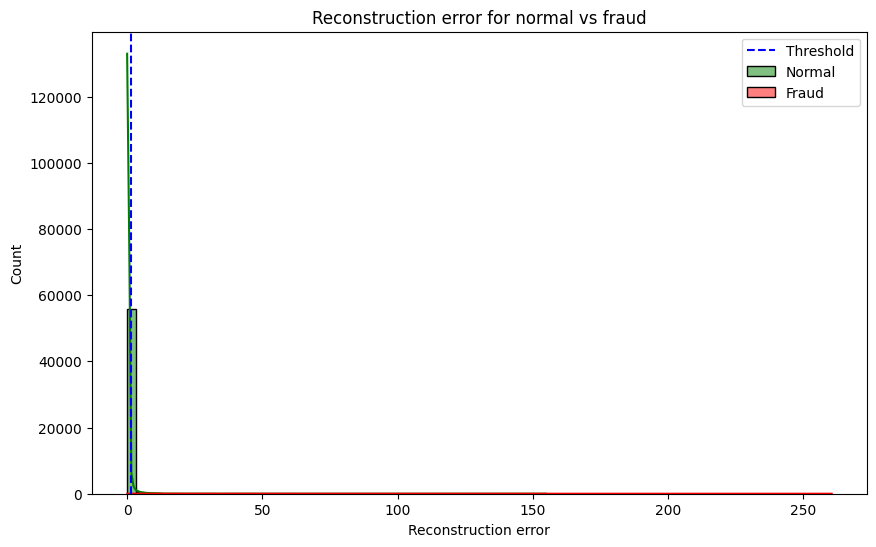

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(mse[y_test == 0], label='Normal', color='green', bins=50, kde=True)
sns.histplot(mse[y_test == 1], label='Fraud', color='red', bins=50, kde=True)
plt.axvline(threshold, color='blue', linestyle='--', label='Threshold')
plt.legend()
plt.title("Reconstruction error for normal vs fraud")
plt.xlabel("Reconstruction error")
plt.ylabel("Count")
plt.show()
